# Semi-Monocoque Theory: corrective solutions

In [1]:
from pint import UnitRegistry
import sympy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
from IPython.display import display

Import **Section** class, which contains all calculations

In [2]:
sys.path.append('./')
from Section import Section

Initialization of **sympy** symbolic tool and **pint** for dimension analysis (not really implemented rn as not directly compatible with sympy)

In [3]:
ureg = UnitRegistry()
sympy.init_printing()

Define **sympy** parameters used for geometric description of sections

In [4]:
A, A0, t, t0, a, b, h, L, E, G = sympy.symbols('A A_0 t t_0 a b h L E G', positive=True)

We also define numerical values for each **symbol** in order to plot scaled section and perform calculations

In [5]:
values = [(A, 150 * ureg.millimeter**2),(A0, 250  * ureg.millimeter**2),(a, 40 * ureg.millimeter), \
          (b, 20 * ureg.millimeter),(h, 60 * ureg.millimeter),(L, 2000 * ureg.millimeter)]
datav = [(v[0],v[1].magnitude) for v in values]

# First example: Simple rectangular section

Define graph describing the section:

1) **stringers** are **nodes** with parameters:
- **x** coordinate
- **y** coordinate
- **Area**

2) **panels** are **oriented edges** with parameters:
- **thickness**
- **lenght** which is automatically calculated

In [6]:
stringers = {1:[(3*a,h),A],
             2:[(2*a,h),A],
             3:[(a,h),A],
             4:[(sympy.Integer(0),h),A],
             5:[(sympy.Integer(0),sympy.Integer(0)),A],
             6:[(sympy.Rational(7,4)*a,sympy.Integer(0)),A],
             7:[(3*a,sympy.Integer(0)),A]}

panels = {(1,2):t,
          (2,3):t,
          (3,4):t,
          (4,5):t,
          (5,6):t,
          (6,7):t,
          (7,1):t}

Define section and perform first calculations

In [7]:
S1 = Section(stringers, panels)

Nodes False for Y !
compute SC 
Nodes False for X !
compute SC 


In [8]:
S1.cycles

## Plot of **S1** section in original reference frame

Define a dictionary of coordinates used by **Networkx** to plot section as a Directed graph.
Note that arrows are actually just thicker stubs

In [9]:
start_pos={ii: [float(S1.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

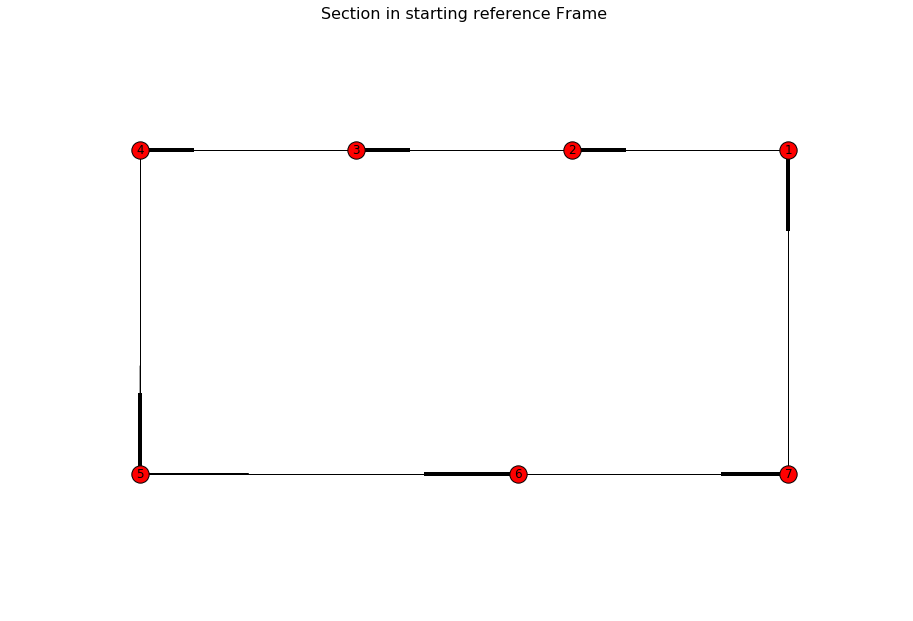

In [10]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

## Plot of **S1** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [11]:
positions={ii: [float(S1.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

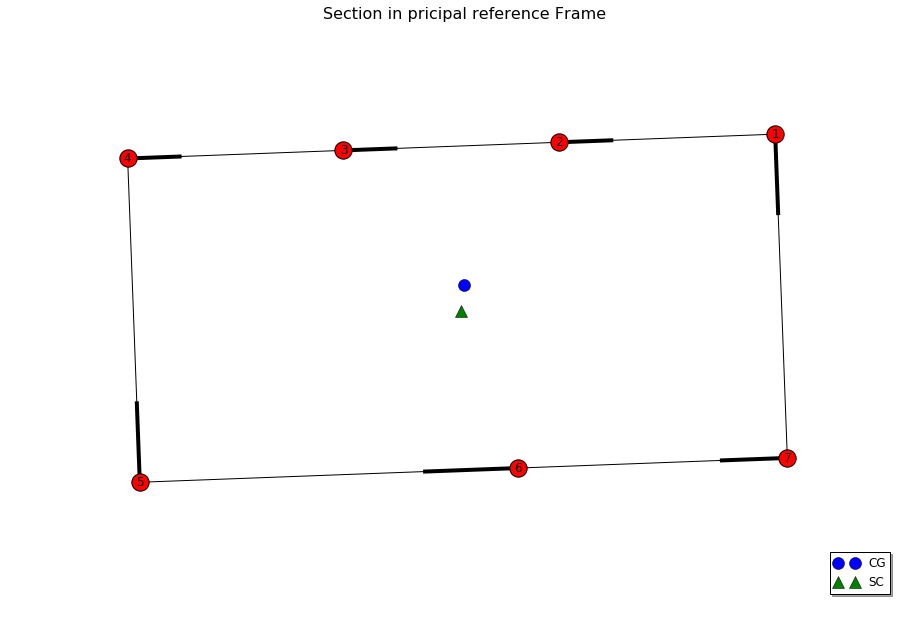

In [12]:
x_ct, y_ct = S1.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

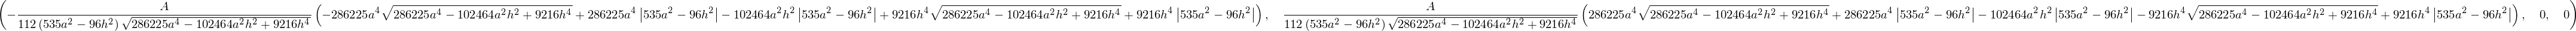

In [13]:
sympy.simplify(S1.Ixx), sympy.simplify(S1.Iyy), sympy.simplify(S1.Ixy), sympy.simplify(S1.θ)

In [14]:
S1.symmetry

[{'edges': [], 'nodes': []}, {'edges': [], 'nodes': []}]

In [15]:
S1.compute_L()

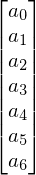

In [16]:
S1.val

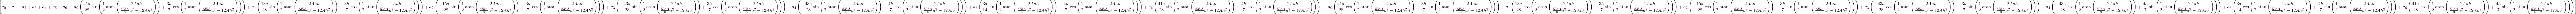

In [17]:
S1.expr

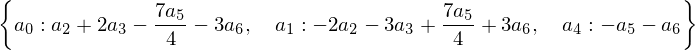

In [18]:
S1.sol1

In [19]:
#S1.sol2

In [20]:
S1.free

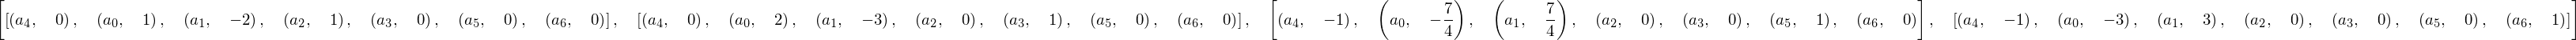

In [21]:
S1.sol_list

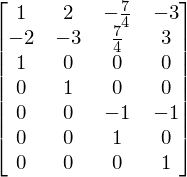

In [22]:
S1.L

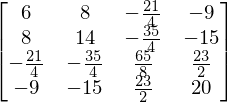

In [23]:
S1.L.T*S1.L

# TEST

In [24]:
#aa = sympy.numbered_symbols('a')
aa = sympy.symbols('a0:3')
aa

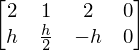

In [25]:
system = sympy.Matrix(( (2, 1, 2,0), (h, h/2, -h,0)))
system

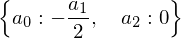

In [26]:
sympy.solve_linear_system(system, *aa)


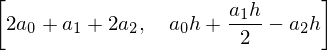

In [27]:
L = []
L.append([aa[0],aa[2],aa[2],aa[0],aa[1]])
L.append([ aa[0]*h/2,aa[2]*(-h/2),aa[2]*(-h/2),aa[0]*h/2,aa[1]*h/2  ])
expr = [sum(Li) for Li in L ]
expr

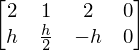

In [28]:
system1=sympy.zeros(len(aa)+1,2)
for k in range(2):
    dd = sympy.poly(expr[k],aa)
    system1[0:len(aa),k] = dd.coeffs()
system1.T

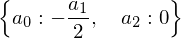

In [29]:
sol = sympy.solve_linear_system(system1.T, *aa)
sol

In [30]:
#set(aa)-set(sol)
[ai for ai in aa if ai not in sol]

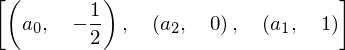

In [31]:
lsol = [(ai,sol[ai].subs(aa[1],1)) for ai in sol]
lsol.append((aa[1],1))
lsol

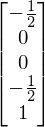

In [32]:
Lf = sympy.Matrix([Li.subs(lsol) for Li in L[0]])
Lf

In [33]:
T = -Lf
T[-1] = 0
T

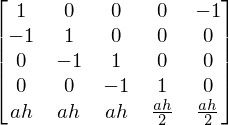

In [34]:
A = sympy.Matrix([[1,0,0,0,-1],[-1,1,0,0,0],[0,-1,1,0,0],[0,0,-1,1,0],[a*h,a*h,a*h,a*h/2,a*h/2]])
A

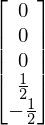

In [35]:
Hf = A.LUsolve(T)
Hf